In [2]:
import os
os.chdir(r'/Users/zhanghui/商业分析工具和应用/Python/Python_book/9DT')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
accepts = pd.read_csv('accepts.csv')
accepts = accepts.dropna(axis = 0,how = 'any')
accepts.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75
5,8712513,16979,0,2000.0,DODGE,Y,2.0,15.0,136.0,4.0,...,26272.72,26375.0,0.00,36,26272.72,100.0,5400.00,1.0,0,4.75


In [5]:
target = accepts['bad_ind']
data = accepts.ix[:,'bankruptcy_ind':'used_ind']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [6]:
#衍生变量
data['lti_temp'] = data['loan_amt']/data['tot_income']
data['lti_temp'] = data['lti_temp'].map(lambda x: 10 if x>=10 else x)
del data['loan_amt']
data['bankruptcy_ind'] = data['bankruptcy_ind'].replace({'N':0,'Y':1})
data.head()

,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,ltv,tot_income,veh_mileage,used_ind,lti_temp
0,0,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,99.0,6550.00,24000.0,1,2.625954
1,0,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,99.0,4666.67,22.0,0,4.197541
3,0,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,118.0,1500.00,10000.0,1,7.200000
4,0,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,122.0,4144.00,14.0,0,6.353292
5,1,2.0,15.0,136.0,4.0,3.0,3651.0,5747.0,64,680.0,26272.72,26375.0,0.00,36,100.0,5400.00,1.0,0,4.865319


In [7]:
#将数据集划分为训练集和测试集
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(
data,target,test_size = 0.2, train_size = 0.8,random_state = 1234)

In [8]:
#决策树模型训练
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini',
                           max_depth = 3,
                            class_weight = None,
                            random_state = 1234)#支持entropy和gini
clf.fit(train_data,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [9]:
#模型评估
import sklearn.metrics as metrics
print(metrics.classification_report(test_target,clf.predict(test_data)))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       648
           1       0.51      0.16      0.24       173

    accuracy                           0.79       821
   macro avg       0.66      0.56      0.56       821
weighted avg       0.75      0.79      0.74       821



结果显示，违约客户（1）中的灵敏度recall只有0.16，太低了，说明模型识别违约客户能力不足。为了突出违约客户，对不同的因变量标签设置权重。

In [11]:
clf.set_params(**{'class_weight':{0:1,1:3}}) #设置bad_ind为0的样本权重为1，为1的权重为3）
clf.fit(train_data,train_target)
print(metrics.classification_report(test_target,clf.predict(test_data)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       648
           1       0.39      0.57      0.46       173

    accuracy                           0.72       821
   macro avg       0.63      0.67      0.64       821
weighted avg       0.77      0.72      0.74       821



In [13]:
#变量重要性
list(zip(data.columns,clf.feature_importances_))

[('bankruptcy_ind', 0.0),
 ('tot_derog', 0.0),
 ('tot_tr', 0.0),
 ('age_oldest_tr', 0.0),
 ('tot_open_tr', 0.0),
 ('tot_rev_tr', 0.0),
 ('tot_rev_debt', 0.0),
 ('tot_rev_line', 0.1575107029076355),
 ('rev_util', 0.0),
 ('fico_score', 0.6940581964952662),
 ('purch_price', 0.0),
 ('msrp', 0.0),
 ('down_pyt', 0.0),
 ('loan_term', 0.0),
 ('ltv', 0.14843110059709827),
 ('tot_income', 0.0),
 ('veh_mileage', 0.0),
 ('used_ind', 0.0),
 ('lti_temp', 0.0)]

可以看到，变量fico_score重要性最高，其次是tot_rev_line和ltv

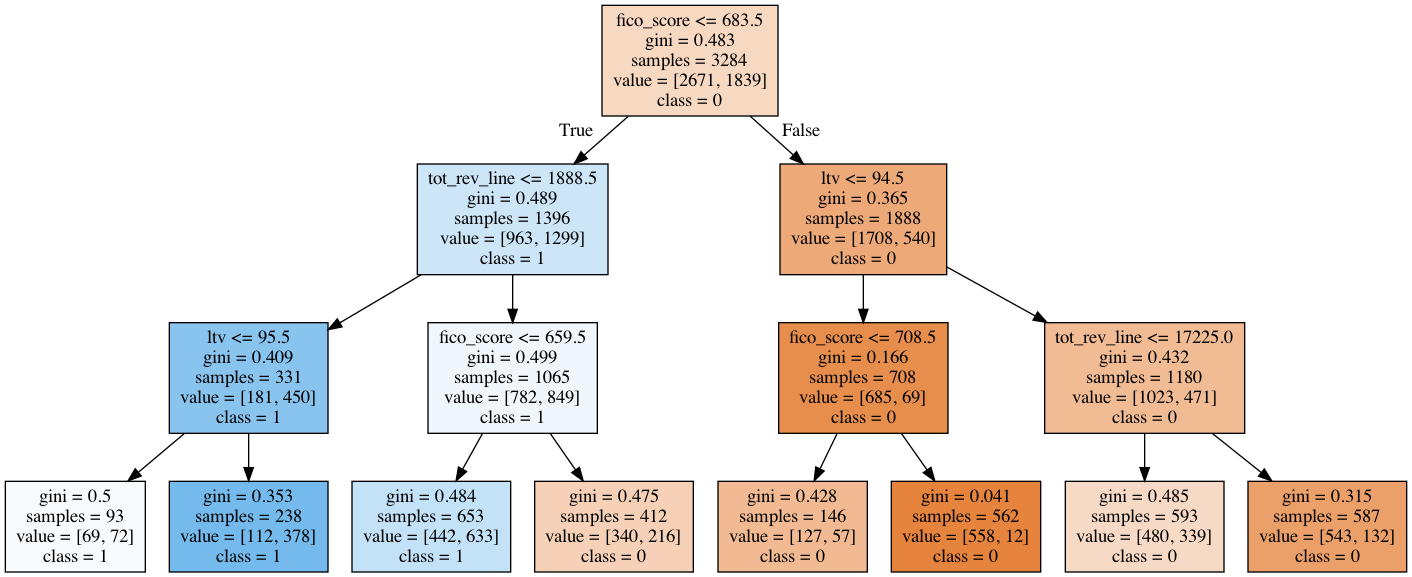

In [15]:
#决策时可视化
import pydotplus
from IPython.display import Image
import sklearn.tree as tree

dot_data = tree.export_graphviz(clf,
                               out_file = None,
                               feature_names = data.columns,
                               class_names = ['0','1'],
                               filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
#保存图片
dot_data = tree.export_graphviz(clf,out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('tree.pdf')

True

In [18]:
#参数搜索调优
#使用scikit-learn提供给的参数搜索GridSearchCV,它会使用交叉验证来自动搜索最优参数
from sklearn.model_selection import ParameterGrid,GridSearchCV


In [20]:
max_depth = [None,]
max_leaf_nodes = np.arange(5,10,1)
class_weight = [{0:1,1:2},{0:1,1:3}]

param_grid = {'max_depth':max_depth,
             'max_leaf_nodes':max_leaf_nodes,
             'class_weight':class_weight}
clf_cv = GridSearchCV(estimator = clf,
                     param_grid = param_grid,
                     cv = 5,
                     scoring = 'roc_auc')
clf_cv.fit(train_data,train_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1234,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}],
                         'max_depth': [None],
              

总共会建模5*2*5=50次，寻找最优参数

In [21]:
print(metrics.classification_report(test_target,
                                   clf_cv.predict(test_data)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       648
           1       0.42      0.49      0.45       173

    accuracy                           0.75       821
   macro avg       0.64      0.65      0.65       821
weighted avg       0.77      0.75      0.76       821



In [22]:
#最优参数为
clf_cv.best_params_

{'class_weight': {0: 1, 1: 2}, 'max_depth': None, 'max_leaf_nodes': 8}

In [24]:
#对调过的模型进一步评估，先使用模型预测

train_est = clf_cv.predict(train_data)
train_est_p = clf_cv.predict_proba(train_data)[:,1]
test_est = clf_cv.predict(test_data)
test_est_p = clf_cv.predict_proba(test_data)[:,1]

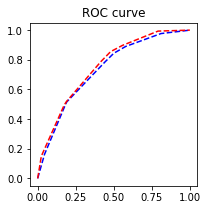

In [25]:
#ROC
fpr_test,tpr_test,th_test = metrics.roc_curve(test_target,test_est_p)
fpr_train,tpr_train,th_train = metrics.roc_curve(train_target,train_est_p)

plt.figure(figsize = [3,3])
plt.plot(fpr_test,tpr_test,'b--')
plt.plot(fpr_train,tpr_train,'r--')
plt.title('ROC curve')
plt.show()

In [26]:
print(metrics.roc_auc_score(test_target,test_est_p))

0.7358256618853921


In [ ]:
对ROC的参数还不是特别明白